In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data=pd.read_excel("data sheet - himanshu.xlsx")

In [53]:
data

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-11,1.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN
1,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-11-16,1000.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN
2,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-03-17,800.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN
3,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-11-13,30.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN
4,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-03-30,10000.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN
...,...,...,...,...,...,...,...,...,...
4028,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/220300754301/ppp/VANAMADAYU/Bank of B...,2022-07-22,34000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN
4029,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/213612215660/opentxn53745386/Dee /F,2022-02-24,49313.0,DEBIT,UTILITIES AND BILLS,CREDIT CARD PAYMENT,NaN
4030,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/211718997626/opentxn51329887/Mir /U,2021-07-09,80000.0,DEBIT,UTILITIES AND BILLS,CREDIT CARD PAYMENT,NaN
4031,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/221215343700/W/GADGET ZON/HDFC Bank,2022-08-01,100000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,GADGET ZONE


In [54]:
data=data.sort_values(by='valueDate',ascending=True)

In [55]:
data.columns

Index(['source ', 'USER id', 'narration', 'valueDate', 'amount', 'type',
       'category', 'subcategory', 'merchant name '],
      dtype='object')

In [56]:
data["merchant name "].fillna("Not Available", inplace = True)

In [57]:
print(data["merchant name "].value_counts())

Not Available                              3851
CITIBANK                                     13
BAJAJ FINANCE                                11
ZOMATO                                       11
FIAT INDIA AUTOMOBILS PVT LTD                 9
                                           ... 
CRED                                          1
PAYSENSE SERVICES                             1
PAYSENSE SERVICES INDIA PRIVATE LIMITED       1
COINDCX                                       1
GADGET ZONE                                   1
Name: merchant name , Length: 84, dtype: int64


<AxesSubplot:xlabel='valueDate', ylabel='amount'>

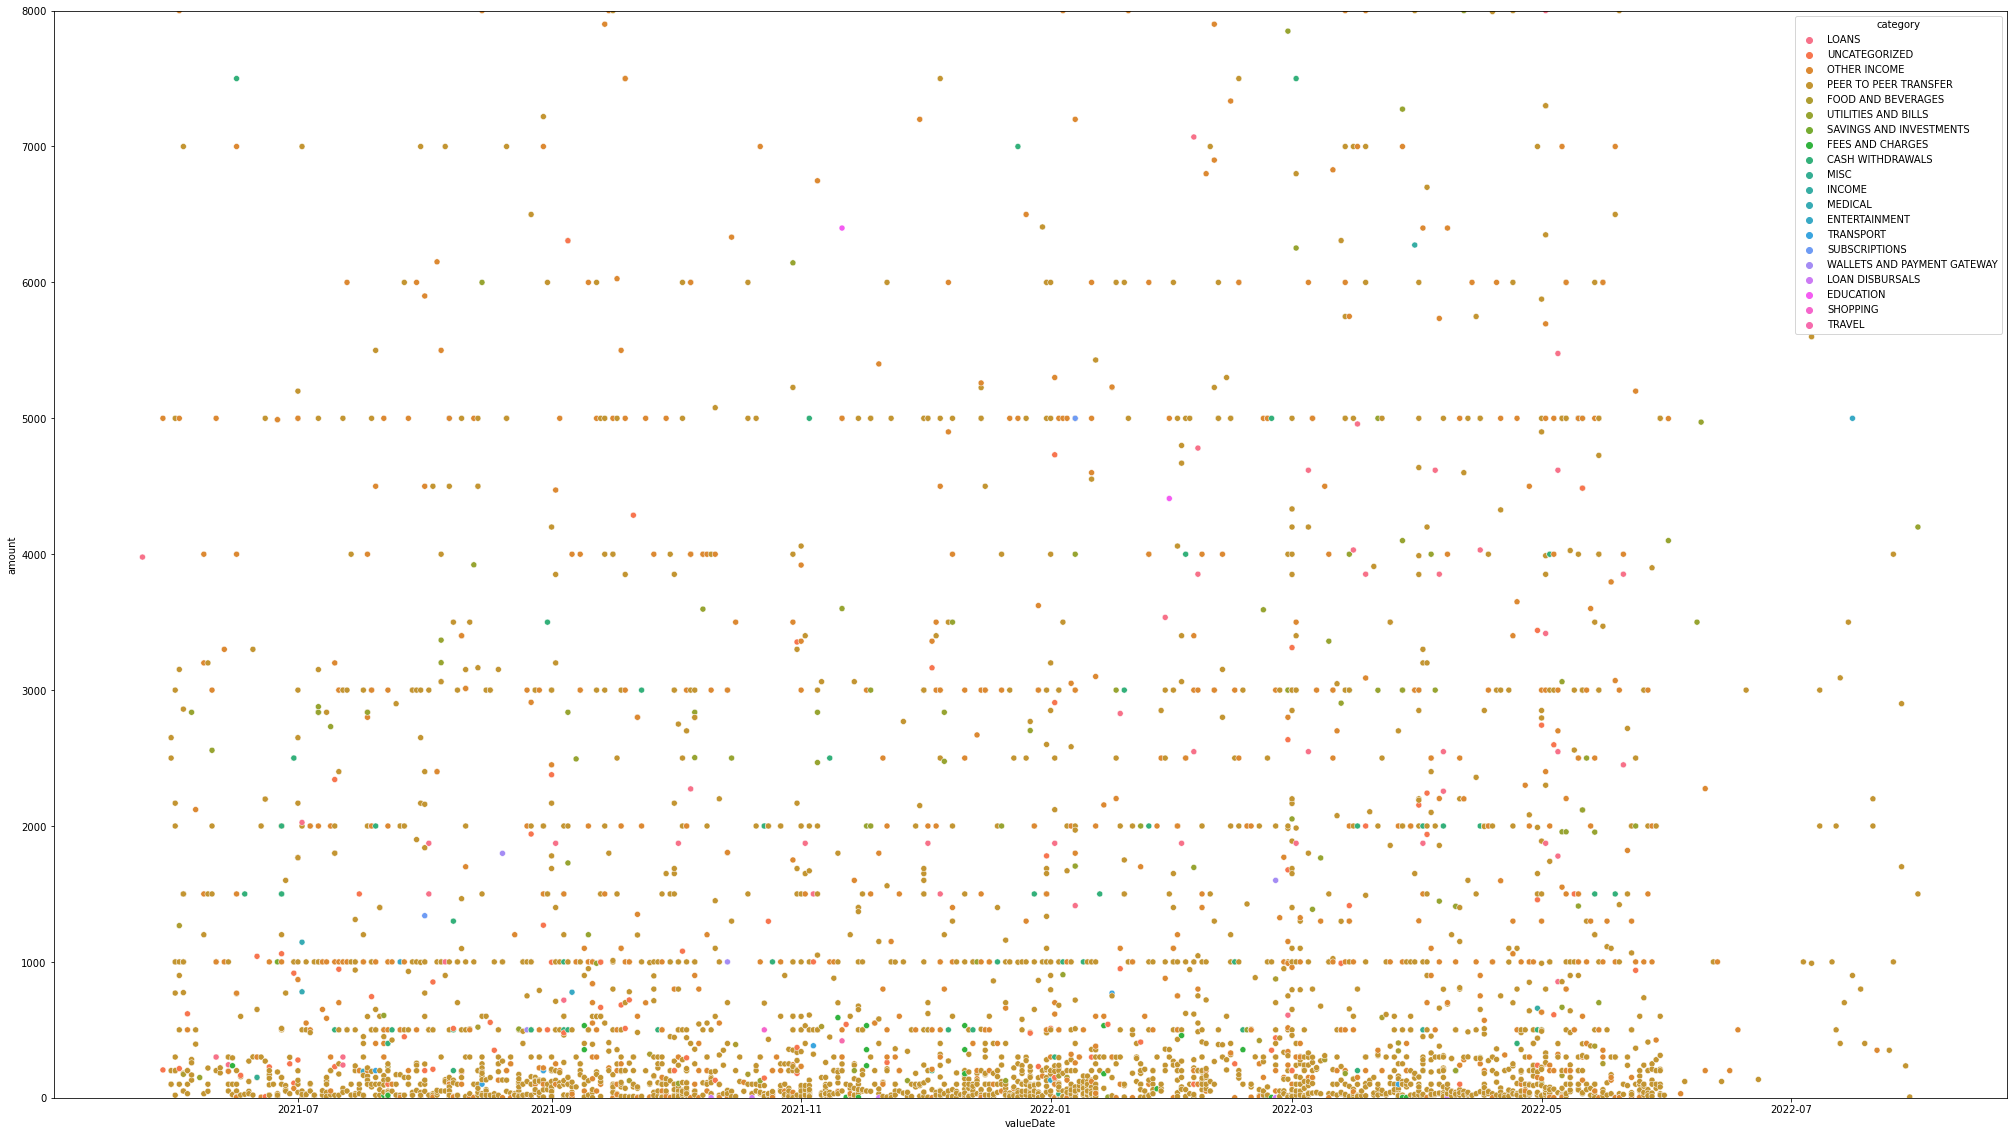

In [58]:
plt.figure(figsize=(35, 20))
plt.ylim(0, 8000)
sns.scatterplot(data=data,x="valueDate",y="amount",hue="category")

<AxesSubplot:xlabel='valueDate', ylabel='amount'>

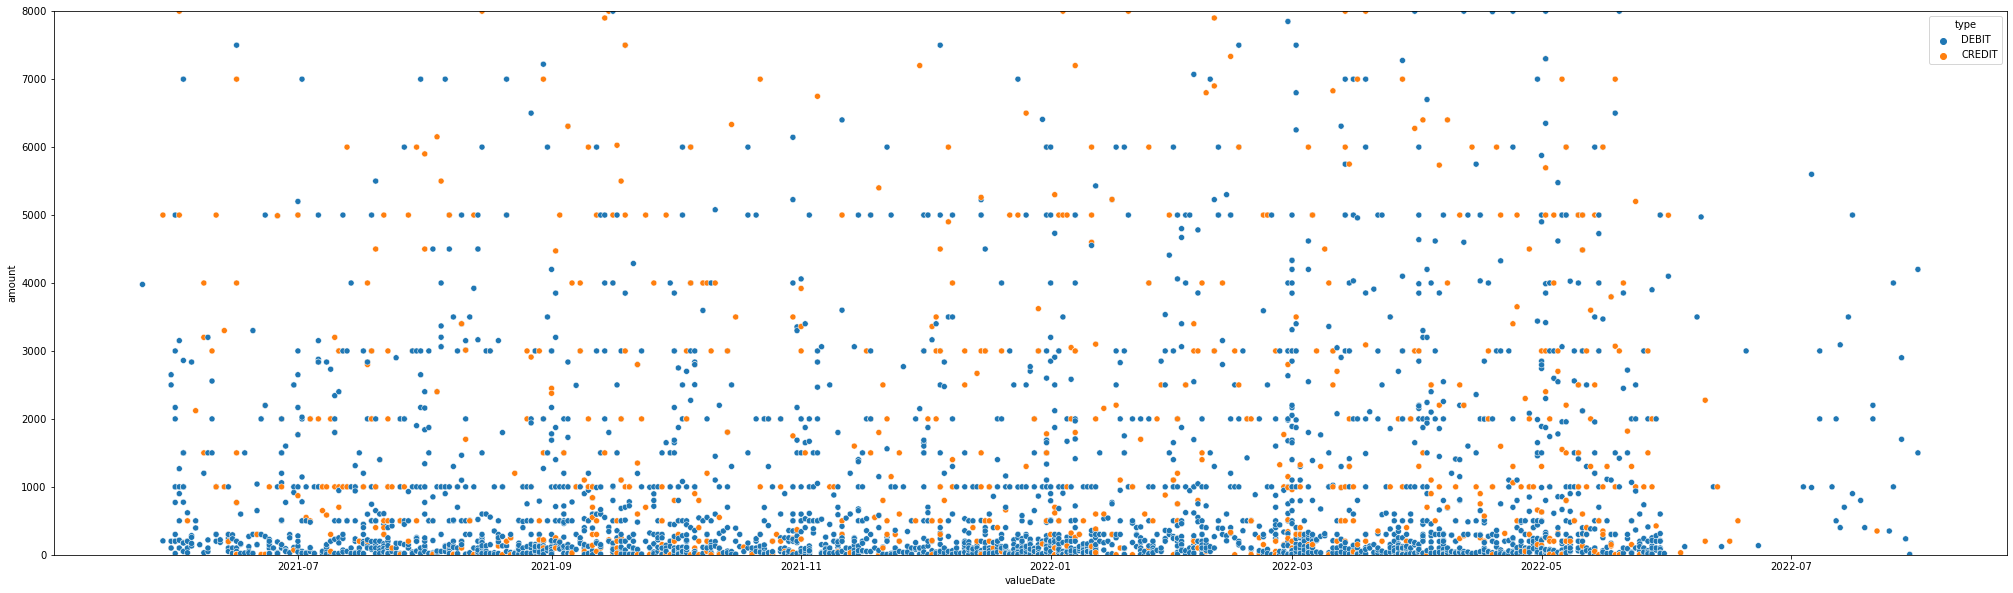

In [59]:
plt.figure(figsize=(35, 10))
plt.ylim(0, 8000)
sns.scatterplot(data=data,x="valueDate",y="amount",hue="type")

In [60]:
s=data["category"].value_counts()>=3
s

PEER TO PEER TRANSFER           True
OTHER INCOME                    True
UNCATEGORIZED                   True
UTILITIES AND BILLS             True
CASH WITHDRAWALS                True
LOANS                           True
FEES AND CHARGES                True
FOOD AND BEVERAGES              True
INCOME                          True
LOAN DISBURSALS                 True
TRANSPORT                       True
ENTERTAINMENT                   True
WALLETS AND PAYMENT GATEWAY     True
MISC                            True
SUBSCRIPTIONS                   True
EDUCATION                       True
SAVINGS AND INVESTMENTS        False
MEDICAL                        False
SHOPPING                       False
TRAVEL                         False
Name: category, dtype: bool

In [61]:
data_credit=data[data["type"]=="CREDIT"]

In [62]:
data_debit=data[data["type"]=="DEBIT"]

<AxesSubplot:xlabel='valueDate', ylabel='amount'>

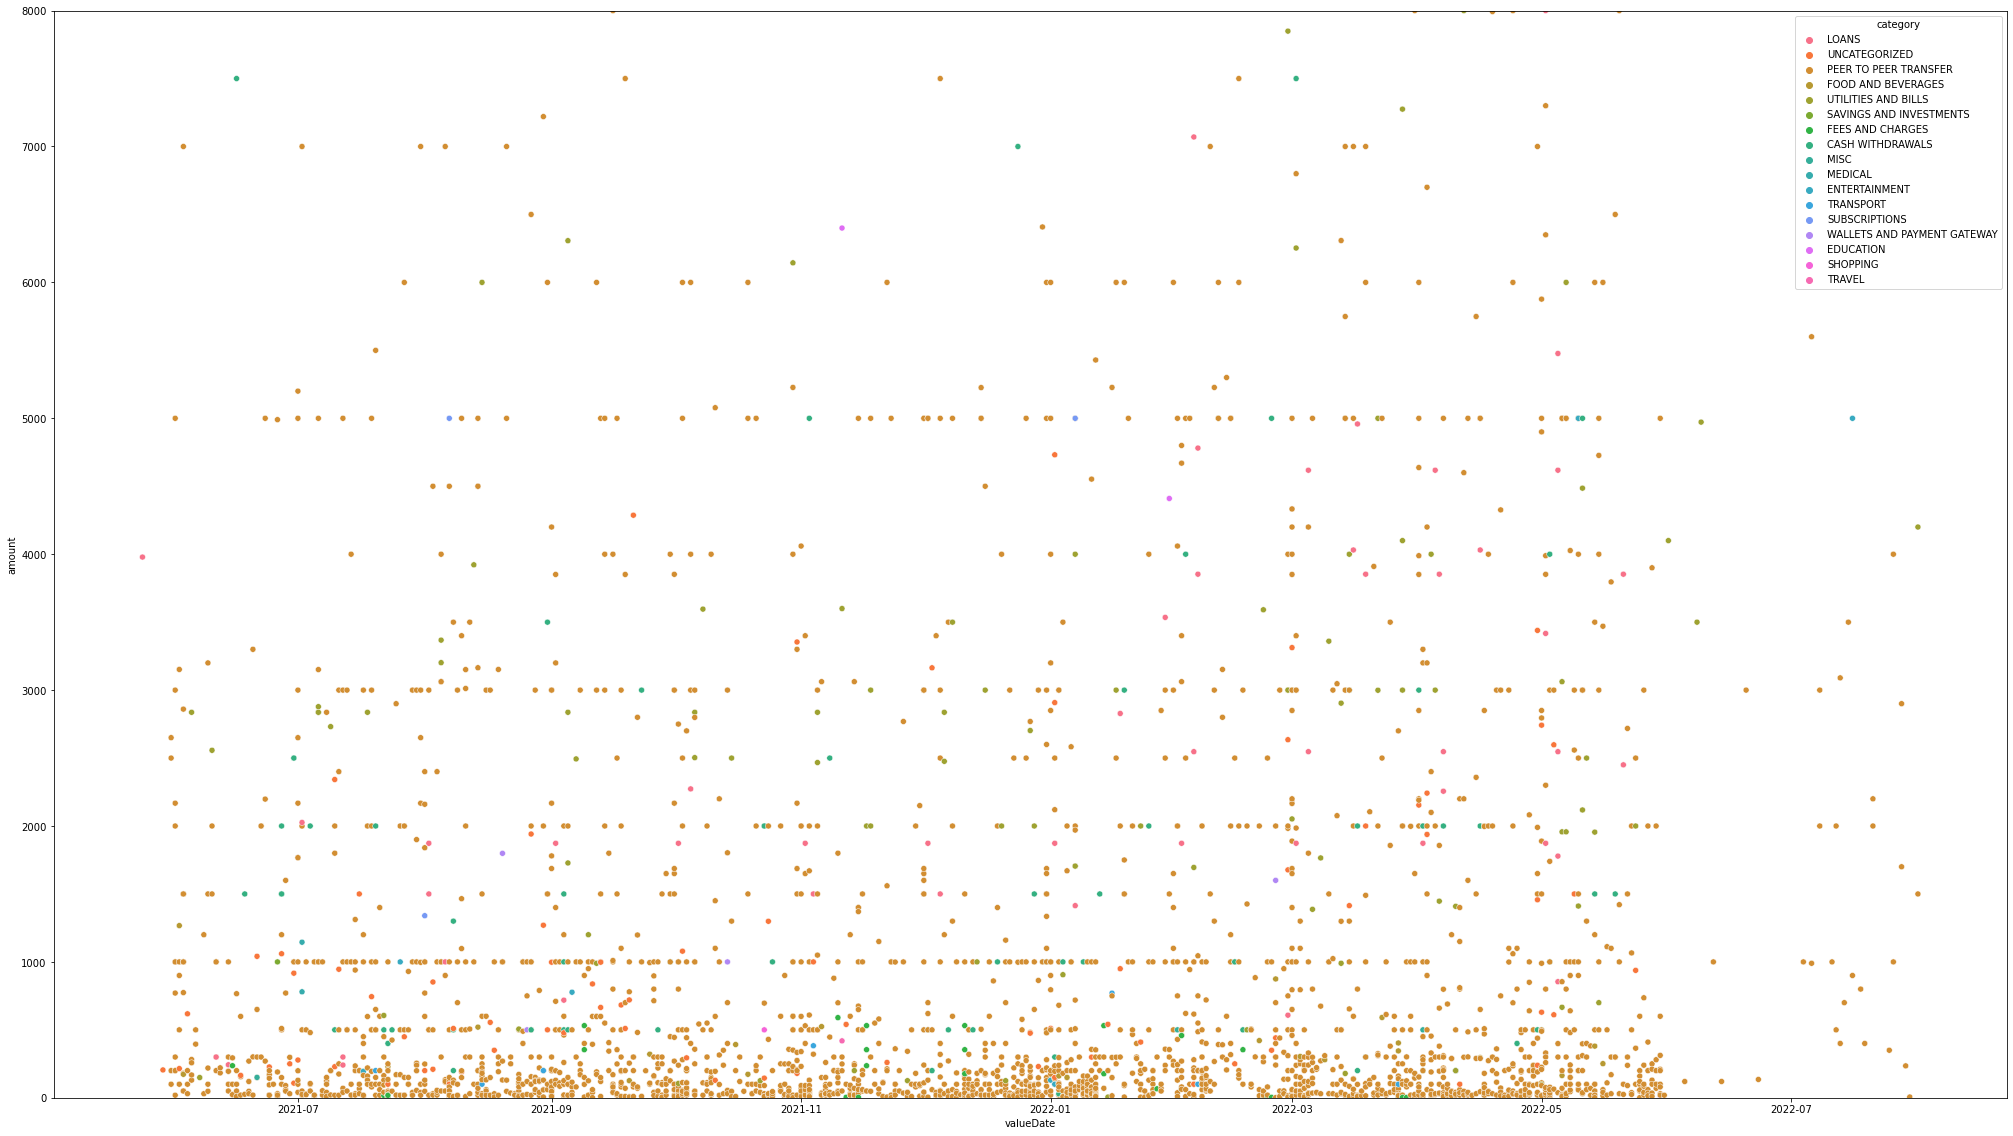

In [63]:
plt.figure(figsize=(35, 20))
plt.ylim(0, 8000)
sns.scatterplot(data=data_debit,x="valueDate",y="amount",hue="category")

<AxesSubplot:xlabel='valueDate', ylabel='amount'>

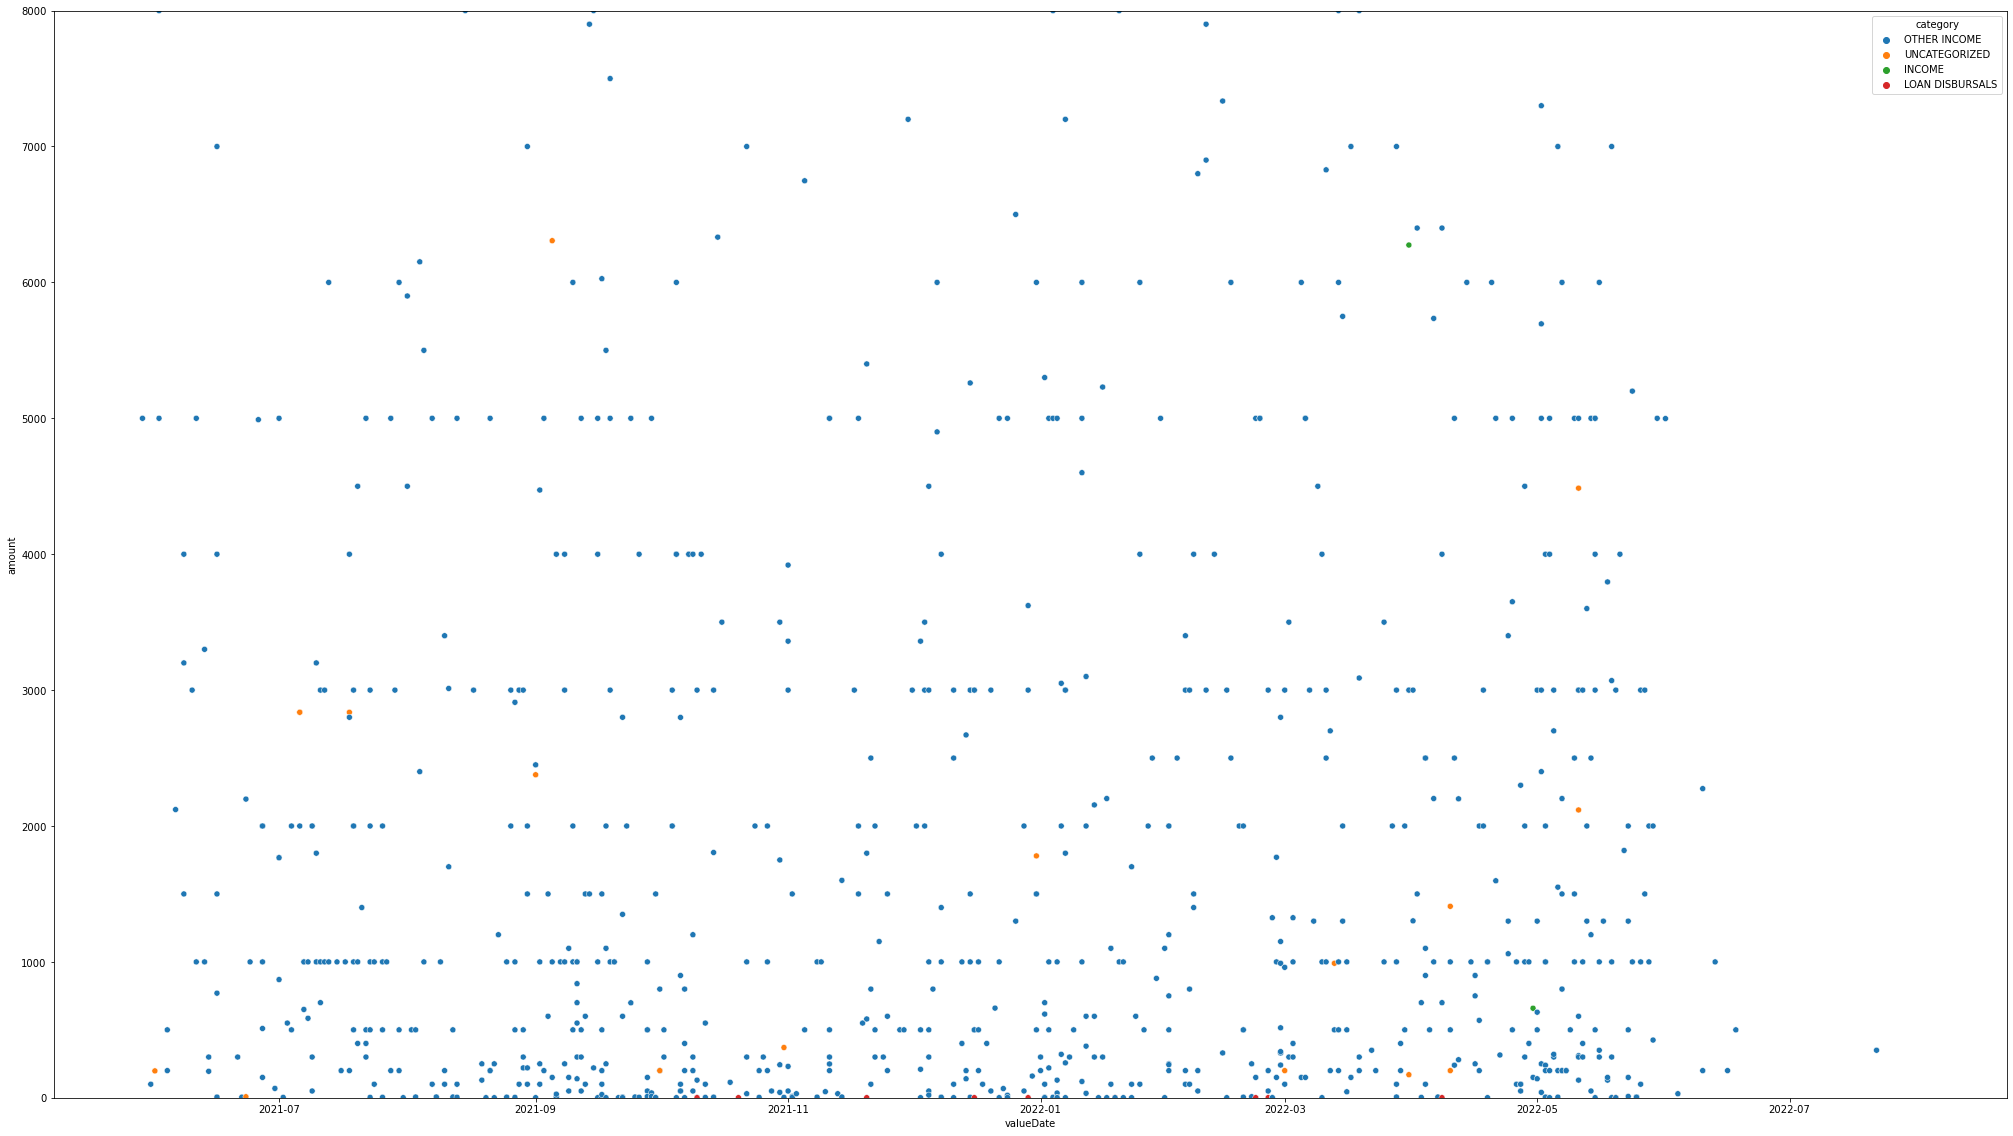

In [64]:
plt.figure(figsize=(35, 20))
plt.ylim(0, 8000)
sns.scatterplot(data=data_credit,x="valueDate",y="amount",hue="category")

In [65]:
d_credit=[]
d_debit=[]

In [66]:
for i in data_credit["category"].unique():
    d_credit.append(data_credit[data_credit["category"]==i])

In [67]:
for i in data_debit["category"].unique():
    d_debit.append(data_debit[data_debit["category"]==i])

# **Category :**

In [68]:
def fun_dataprep(l):
    df_new=[]
    d=l
    for df in d:
        df['year'] = pd.to_datetime(df['valueDate']).dt.year
        df['month'] = pd.to_datetime(df['valueDate']).dt.month
        df['day'] = pd.to_datetime(df['valueDate']).dt.day
        
        df_new.append(df)
    return df_new
        

In [69]:
d_credit_new=fun_dataprep(d_credit)
d_debit_new=fun_dataprep(d_debit)

In [70]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [71]:
d_credit_final=[]
d_debit_final=[]

In [72]:
for i in d_credit_new:
    for j in i["merchant name "].unique():
        d_credit_final.append(i[i["merchant name "]==j])

In [73]:
for i in d_debit_new:
    for j in i["merchant name "].unique():
        d_debit_final.append(i[i["merchant name "]==j])

In [74]:
def main_py(EMI_debit):
    amount_col="amount"
    amount_tolerance=0.05
    def fun2(x):
        day=x["day"]
        test=x["freq"]
        if day!=31:
            test=test[(test["day"]>=day-1) & (test["day"]<=day+1)]
        else:
            test=test[(test["day"]>=day-1) & (test["day"]==1)]
            
        return len(test)

    try:

        EMI_debit['freq'] = EMI_debit[amount_col].map(lambda x: (EMI_debit[(EMI_debit[amount_col] >= x - x * amount_tolerance) & 
                        (EMI_debit[amount_col] <= x + x * amount_tolerance)] ))
        EMI_debit['length']= EMI_debit.apply(lambda x : fun2(x), axis=1)
        EMI_debit["recurring"]=EMI_debit["length"].map(lambda x: "Recurring" if x>=3 else "Non recurring")

        return EMI_debit

    except:
        return pd.DataFrame()

In [75]:
final=pd.DataFrame()

In [76]:
for i in d_credit_final:
    final=pd.concat([final,main_py(i)],axis=0)
    


In [77]:
for i in d_debit_final:
    final=pd.concat([final,main_py(i)],axis=0)

In [78]:
final.sort_index(ascending=True,inplace=True)

In [79]:
final

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,year,month,day,freq,length,recurring
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-11,1.0,DEBIT,PEER TO PEER TRANSFER,UPI,Not Available,2021,9,11,source USE...,1,Non recurring
1,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-11-16,1000.0,DEBIT,PEER TO PEER TRANSFER,UPI,Not Available,2021,11,16,source USE...,10,Recurring
2,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-03-17,800.0,DEBIT,PEER TO PEER TRANSFER,UPI,Not Available,2022,3,17,source USE...,4,Recurring
3,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-11-13,30.0,DEBIT,PEER TO PEER TRANSFER,UPI,Not Available,2021,11,13,source USE...,10,Recurring
4,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-03-30,10000.0,DEBIT,PEER TO PEER TRANSFER,UPI,Not Available,2022,3,30,source USE...,6,Recurring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/220300754301/ppp/VANAMADAYU/Bank of B...,2022-07-22,34000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,Not Available,2022,7,22,source USER id...,1,Non recurring
4029,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/213612215660/opentxn53745386/Dee /F,2022-02-24,49313.0,DEBIT,UTILITIES AND BILLS,CREDIT CARD PAYMENT,Not Available,2022,2,24,source USER id...,1,Non recurring
4030,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/211718997626/opentxn51329887/Mir /U,2021-07-09,80000.0,DEBIT,UTILITIES AND BILLS,CREDIT CARD PAYMENT,Not Available,2021,7,9,source USER id...,1,Non recurring
4031,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/221215343700/W/GADGET ZON/HDFC Bank,2022-08-01,100000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,GADGET ZONE,2022,8,1,source USER id...,1,Non recurring


In [80]:
final.to_excel("with_merchant_output.xlsx")

<AxesSubplot:xlabel='valueDate', ylabel='amount'>

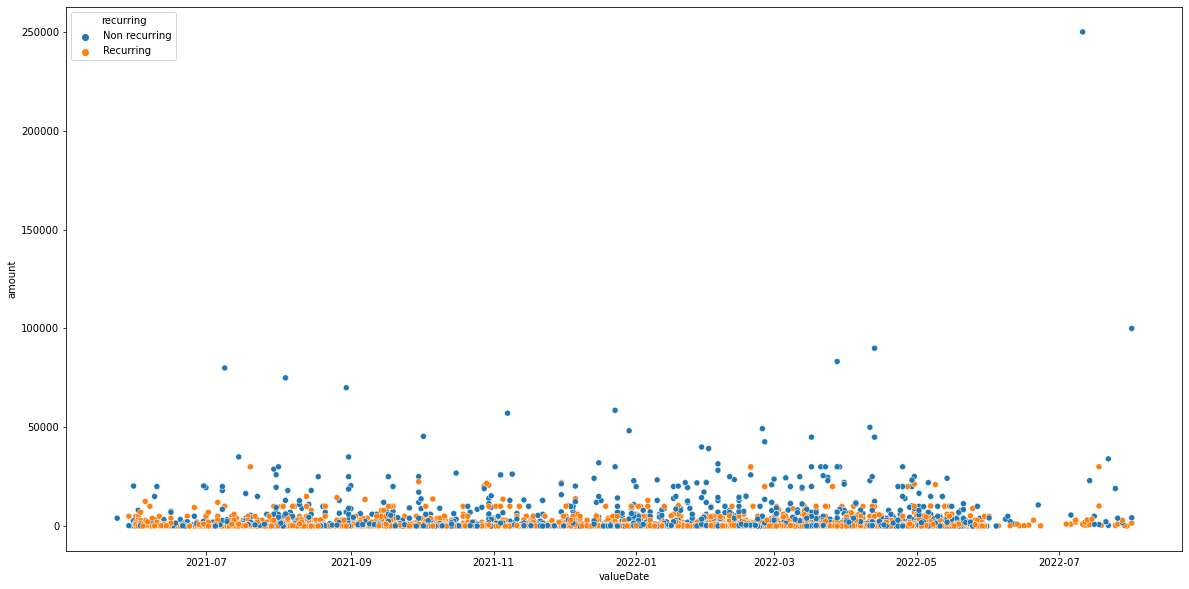

In [81]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=final,x="valueDate",y="amount",hue="recurring",palette="tab10")